# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,235,90,48,78,134,56,11,160,43,20,167,169,366,185,76,1,14,182,192
1,186,91,42,81,193,69,5,169,38,20,137,184,434,156,68,3,23,198,204
2,261,91,39,88,189,63,9,175,38,21,132,197,457,156,69,0,23,191,198
3,522,89,36,69,162,63,6,140,48,18,131,164,291,126,66,1,38,193,204
4,282,86,46,73,125,57,6,151,45,19,147,170,334,188,82,9,11,180,184
5,712,105,45,100,195,61,10,198,33,23,149,214,586,186,67,8,5,192,200
6,99,87,44,65,124,56,6,149,46,19,144,170,321,171,87,4,12,179,182
7,52,98,55,101,228,70,9,210,31,24,168,236,661,245,72,1,6,188,197
8,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
9,732,85,45,73,167,69,8,143,46,18,148,173,307,176,71,2,0,190,199


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,423.353370,94.040073,45.103825,82.794171,169.382514,61.493625,8.489982,170.291439,40.637523,20.708561,148.639344,189.497268,447.799636,175.956284,72.335155,6.597450,12.810565,188.943534,195.648452
std,243.216364,8.215518,6.161613,15.858622,32.503107,6.962783,4.058243,33.932129,7.908564,2.655860,14.498086,31.474739,181.017854,31.944093,7.179697,4.858591,8.880420,6.135818,7.416094
min,0.000000,76.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,115.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,207.000000,88.000000,40.000000,70.000000,142.000000,57.000000,7.000000,146.000000,33.000000,19.000000,138.000000,167.000000,317.000000,150.000000,67.000000,3.000000,6.000000,185.000000,191.000000
50%,430.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,158.000000,43.000000,20.000000,147.000000,179.000000,367.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,630.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,217.000000,611.000000,200.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,112.000000,252.000000,126.000000,52.000000,265.000000,61.000000,29.000000,188.000000,287.000000,1018.000000,268.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

__Что видим сразу?__

- все значения в X числовые, one hot encoding не нужен
- NA отсутствуют

Поглядим на матрицу корреляции признаков:

In [6]:
corr_matr = X_train_pd.corr()
corr_matr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.038349,0.029395,0.042335,0.010576,-0.066158,-0.025362,0.045603,-0.040890,0.038199,0.026434,0.027679,0.041224,0.018027,-0.041507,-0.024975,0.020544,-0.028539,-0.012668
1,0.038349,1.000000,0.717612,0.800039,0.714473,0.103363,0.166782,0.819447,-0.794801,0.819306,0.693360,0.782223,0.824274,0.620217,-0.240918,0.233377,0.145750,0.261809,0.327505
2,0.029395,0.717612,1.000000,0.795679,0.633102,0.138147,0.261045,0.865924,-0.835775,0.864394,0.965393,0.819190,0.858933,0.937199,0.064922,0.133855,-0.015314,-0.117038,0.023044
3,0.042335,0.800039,0.795679,1.000000,0.789425,0.162217,0.280262,0.906012,-0.913144,0.892519,0.768931,0.872685,0.887369,0.709936,-0.230756,0.114024,0.275898,0.126673,0.305793
4,0.010576,0.714473,0.633102,0.789425,1.000000,0.633607,0.356912,0.756091,-0.816149,0.729794,0.570071,0.778024,0.742731,0.560696,-0.288643,0.066843,0.188378,0.394493,0.467653
5,-0.066158,0.103363,0.138147,0.162217,0.633607,1.000000,0.545005,0.106440,-0.198395,0.081607,0.106993,0.196038,0.091485,0.120989,-0.013573,-0.026912,-0.033929,0.291489,0.306510
6,-0.025362,0.166782,0.261045,0.280262,0.356912,0.545005,1.000000,0.187850,-0.200506,0.186475,0.322401,0.258128,0.161915,0.197361,0.213430,0.038434,0.042885,-0.060445,0.125847
7,0.045603,0.819447,0.865924,0.906012,0.756091,0.106440,0.187850,1.000000,-0.974580,0.992375,0.810365,0.970625,0.996370,0.815446,-0.000177,0.061359,0.205580,-0.020220,0.085317
8,-0.040890,-0.794801,-0.835775,-0.913144,-0.816149,-0.198395,-0.200506,-0.974580,1.000000,-0.952371,-0.776243,-0.956050,-0.958500,-0.785733,0.082777,-0.042795,-0.190863,-0.088720,-0.186181
9,0.038199,0.819306,0.864394,0.892519,0.729794,0.081607,0.186475,0.992375,-0.952371,1.000000,0.813779,0.959896,0.992623,0.813627,0.017764,0.069661,0.206016,-0.046476,0.061681


<AxesSubplot:>

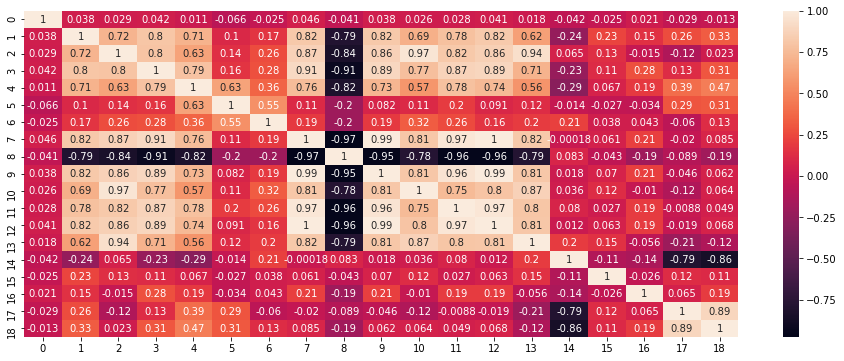

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.heatmap(X_train_pd.corr(), annot=True)

<AxesSubplot:>

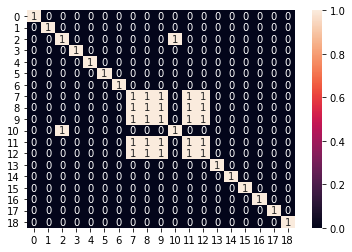

In [9]:
# выделим графически те признаки, которые имеют корреляцию выше 0.95
threshold = 0.95
sns.heatmap(abs(corr_matr) > threshold, annot=True)

Видим, что достаточно высокая корреляция у множества признаков. Обратившись к матрице корреляций (см. выше), можем увидеть, что коррелируют признаки

- 10 и 2 (оставим 2)
- 7, 8, 9, 11, 12 (оставим 7)

Можем дропнуть все, кроме одного из каждой категории. 

In [10]:
X_test_pd = pd.DataFrame(X_test)

X_test_pd.drop(columns=[8, 9, 10, 11, 12], inplace=True)
X_train_pd.drop(columns=[8, 9, 10, 11, 12], inplace=True)

Также поглядим на балансировку:

In [12]:
uni, count = np.unique(y_train, return_counts=True)
dict(zip(uni, count))

{'bus': 138, 'opel': 149, 'saab': 130, 'van': 132}

Видим, что метки сбалансированы, однако они имеют тип объекта:

In [13]:
y_train.dtype

dtype('O')

Заменим метки со стрингов на числовые:

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_labels = le.fit_transform(y_train)

y_train = new_labels
y_train

array([3, 0, 2, 2, 0, 2, 0, 1, 3, 3, 2, 1, 3, 1, 3, 2, 2, 0, 3, 0, 3, 1,
       2, 1, 0, 0, 3, 2, 1, 0, 2, 2, 0, 0, 3, 0, 1, 2, 2, 0, 2, 2, 3, 0,
       1, 0, 0, 3, 0, 1, 3, 1, 1, 2, 1, 1, 0, 1, 2, 3, 1, 0, 3, 3, 2, 2,
       1, 2, 1, 3, 2, 2, 0, 0, 2, 1, 1, 2, 1, 1, 2, 3, 1, 2, 0, 0, 1, 1,
       0, 1, 2, 1, 1, 3, 0, 1, 0, 0, 0, 2, 3, 3, 2, 0, 3, 2, 0, 3, 1, 2,
       2, 0, 1, 1, 3, 1, 0, 3, 2, 3, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 3,
       0, 0, 2, 0, 1, 1, 1, 1, 3, 3, 1, 3, 2, 0, 1, 1, 3, 2, 2, 1, 1, 1,
       3, 3, 3, 3, 2, 2, 2, 0, 3, 2, 3, 0, 2, 1, 1, 2, 0, 0, 1, 1, 3, 3,
       1, 1, 1, 3, 2, 1, 1, 3, 0, 3, 0, 0, 3, 2, 3, 3, 0, 3, 3, 1, 0, 3,
       0, 1, 3, 2, 3, 1, 3, 1, 3, 3, 0, 2, 2, 2, 1, 3, 1, 0, 0, 1, 1, 3,
       0, 2, 1, 1, 2, 0, 1, 1, 0, 1, 3, 0, 1, 2, 3, 3, 0, 3, 3, 0, 2, 2,
       2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 3, 1, 2, 2, 3, 0, 2, 0, 0, 3,
       2, 1, 2, 3, 1, 3, 2, 0, 1, 2, 1, 2, 0, 3, 0, 1, 1, 2, 0, 0, 0, 2,
       3, 1, 2, 3, 1, 2, 1, 3, 0, 2, 0, 2, 1, 2, 1,

In [15]:
test_labels = le.fit_transform(y_test)

y_test = test_labels
y_test

array([3, 1, 1, 2, 1, 3, 3, 2, 1, 3, 0, 3, 2, 3, 2, 3, 0, 2, 2, 2, 0, 2,
       0, 1, 3, 0, 0, 0, 0, 1, 3, 2, 2, 1, 0, 1, 2, 1, 0, 1, 3, 3, 2, 1,
       1, 0, 2, 1, 1, 2, 1, 2, 0, 1, 3, 0, 2, 2, 1, 2, 2, 1, 1, 2, 0, 3,
       0, 3, 2, 1, 0, 0, 3, 1, 2, 3, 1, 0, 0, 1, 1, 2, 3, 0, 2, 2, 0, 2,
       3, 2, 3, 3, 2, 2, 2, 3, 2, 1, 1, 2, 0, 2, 1, 2, 2, 3, 3, 3, 0, 1,
       1, 0, 3, 0, 0, 0, 3, 2, 2, 3, 1, 1, 3, 3, 1, 0, 1, 0, 3, 2, 3, 1,
       2, 3, 3, 0, 3, 2, 1, 0, 1, 2, 2, 2, 1, 2, 3, 0, 1, 1, 2, 0, 0, 0,
       1, 2, 3, 1, 3, 1, 2, 3, 0, 2, 2, 1, 3, 1, 1, 3, 0, 3, 2, 0, 2, 2,
       0, 0, 3, 1, 0, 2, 2, 2, 0, 1, 3, 3, 2, 0, 0, 3, 0, 2, 2, 2, 2, 0,
       2, 0, 0, 3, 0, 2, 0, 2, 0, 2, 3, 2, 3, 3, 0, 1, 2, 0, 1, 2, 0, 0,
       1, 3, 1, 0, 2, 2, 2, 1, 1, 0, 3, 0, 1, 1, 0, 0, 0, 1, 0, 3, 2, 2,
       3, 2, 0, 1, 1, 3, 3, 1, 2, 0, 2, 2, 0, 0, 2, 2, 3, 2, 0, 0, 3, 3,
       0, 1, 2, 0, 3, 3, 3, 3, 2, 0, 0, 2, 2, 1, 0, 1, 3, 2, 2, 1, 3, 0,
       3, 0, 3, 0, 0, 2, 0, 0, 3, 0, 2])

Мы видели характеристики каждой фичи выше в `describe()`. Посмотрим на их распределение визуально:

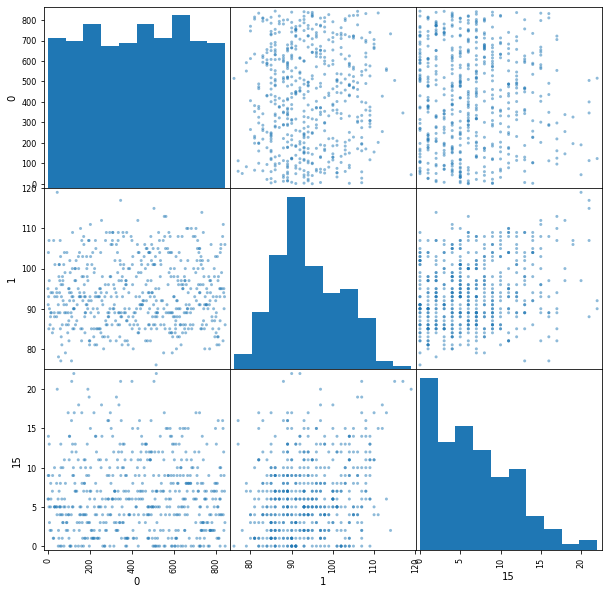

In [16]:
from pandas.plotting import scatter_matrix

scatter_matrix(X_train_pd[[0, 1, 15]], figsize=(10, 10))
plt.show()

Видим большую разницу в порядках значений. Поэтому заскейлим данные:

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train_pd)
X_test_scaled = ss.fit_transform(X_test_pd)

In [18]:
train_columns = X_train_pd.columns
test_columns = X_test_pd.columns

X_train_pd = pd.DataFrame(X_train_scaled)
X_test_pd = pd.DataFrame(X_test_scaled)

X_train_pd.columns = train_columns
X_test_pd.columns = test_columns

In [19]:
X_train_pd

,0,1,2,3,4,5,6,7,13,14,15,16,17,18
0,-0.775133,-0.492210,0.470464,-0.302583,-1.089581,-0.789718,0.619063,-0.303571,0.283369,0.510911,-1.153123,0.134061,-1.132671,-0.492413
1,-0.976784,-0.370378,-0.504195,-0.113239,0.727285,1.079054,-0.860758,-0.038094,-0.625295,-0.604358,-0.741106,1.148451,1.477346,1.127165
2,-0.668135,-0.370378,-0.991525,0.328564,0.604108,0.216544,0.125789,0.138891,-0.625295,-0.464949,-1.359132,1.148451,0.335463,0.317376
3,0.405962,-0.614042,-1.478854,-0.870615,-0.227340,0.216544,-0.614121,-0.893521,-1.565292,-0.883175,-1.153123,2.839101,0.661715,1.127165
4,-0.581714,-0.979537,0.145577,-0.618156,-1.366731,-0.645966,-0.614121,-0.569049,0.377369,1.347363,0.494946,-0.204069,-1.458924,-1.572131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,-1.343047,-0.979537,-0.341752,-0.933730,-0.535283,0.072792,-0.367484,-0.598546,-0.374629,0.371503,-0.535097,-0.429489,-0.153915,-0.492413
545,0.994452,-0.492210,0.308021,0.139220,-0.258134,0.360296,0.372426,-0.215079,0.283369,0.092685,0.494946,-1.443879,-0.643293,-0.087518
546,0.763994,-0.857705,-0.504195,-1.438647,-1.643880,-1.508477,-0.614121,-0.598546,-0.155296,1.765589,-0.947115,0.134061,-1.785176,-1.842061
547,-1.445930,-0.248546,-0.991525,0.517908,0.665696,0.072792,-0.120848,0.168388,-0.781961,-0.743767,-0.741106,1.148451,0.498589,0.587306


Теперь посмотрим на боксплоты каждой фичи, чтобы убрать выбросы:

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
### YOUR CODE HERE

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [ ]:
### YOUR CODE HERE

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
### YOUR CODE HERE

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
### YOUR CODE HERE

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE